In [1]:
import os
from urllib.request import urlretrieve

def download_dataset():

    urls = [
        ("1Da5OQ_EAc0pItQAepAjQxtqluXKjE2et",
        "movies_encoded_budget_filtered.csv"),
    ]

    for (fileId, filename) in urls:
        urlretrieve(f"https://drive.usercontent.google.com/download?id={fileId}&export=download&authuser=1&confirm=t", f"./{filename}")

download_dataset()

In [2]:
import pandas as pd
#movies_weighted = pd.read_csv("nocoeficient.csv")
movies_one_hot_encoded = pd.read_csv("movies_encoded_budget_filtered.csv")

movies_one_hot_encoded.drop(["Unnamed: 0", "Weighted_Rating", "revenue_adjusted"], axis=1, inplace=True)
movies_one_hot_encoded.set_index('title', inplace=True)
print(movies_one_hot_encoded.shape)
movies_one_hot_encoded.head()


(6497, 143)


,year,runtime,gross_adjusted,budget_adjusted,genre_action,genre_adult,genre_adventure,genre_animation,genre_biography,genre_comedy,...,producer_TSG Entertainment,producer_Touchstone Pictures,producer_Universal Pictures,producer_Village Roadshow,producer_Warner Bros,producer_di Bonaventura Pictures,season_Fall,season_Spring,season_Summer,season_Winter
title,,,,,,,,,,,,,,,,,,,,,
Say It Isn't So,2001,95,9.491541e+06,4.301270e+07,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Killers,2010,100,6.575955e+07,1.048017e+08,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
The Pope of Greenwich Village,1984,121,1.800615e+07,2.346117e+07,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
House at the End of the Street,2012,101,4.195325e+07,9.157224e+06,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
The Man from Snowy River,1982,104,6.523282e+07,1.105137e+07,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
for col in movies_one_hot_encoded.columns:
    print(col)

year
runtime
gross_adjusted
budget_adjusted
genre_action
genre_adult
genre_adventure
genre_animation
genre_biography
genre_comedy
genre_crime
genre_documentary
genre_drama
genre_family
genre_fantasy
genre_history
genre_horror
genre_musical
genre_mystery
genre_romance
genre_sci-fi
genre_sport
genre_thriller
genre_tvmovie
genre_war
genre_western
country_Australia
country_Canada
country_China
country_France
country_Germany
country_Hong Kong
country_India
country_Italy
country_Japan
country_New Zealand
country_Other Countries
country_South Korea
country_Spain
country_United Kingdom
country_United States of America
director_Christopher Nolan
director_David Yates
director_J.J. Abrams
director_James Cameron
director_James Wan
director_Jon Favreau
director_Michael Bay
director_Other Directors
director_Peter Jackson
director_Ridley Scott
director_Robert Zemeckis
director_Ron Howard
director_Russo Brothers
director_Sam Raimi
director_Steven Spielberg
director_Tim Burton
star_Ben Stiller
star_Ben

# TRIAL 1

## Prepare Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Suponiendo que `movies_one_hot_encoded` es tu DataFrame
df = movies_one_hot_encoded
X = df.drop('gross_adjusted', axis=1)
y = df['gross_adjusted']


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale continous data from the features
scaler_X = StandardScaler()
continuous_features = ['year', 'runtime', 'budget_adjusted']
scaler_X.fit(X_train[continuous_features])

# Transformar los datos continuos
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_features] = scaler_X.transform(X_train[continuous_features])
X_test_scaled[continuous_features] = scaler_X.transform(X_test[continuous_features])

# Scale target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


## Backward selection

In [ ]:
def backward_elimination(X_train, y_train, X_test, y_test, initial_features):
    features = initial_features[:]
    best_score = float('inf')
    while len(features) > 0:
        scores_with_candidates = []
        for feature in features:
            temp_features = list(features)
            temp_features.remove(feature)
            model = LinearRegression()
            model.fit(X_train[temp_features], y_train)
            y_pred = model.predict(X_test[temp_features])
            mse = mean_squared_error(y_test, y_pred)
            scores_with_candidates.append((mse, feature))

        scores_with_candidates.sort()
        current_score, worst_feature = scores_with_candidates[0]

        if current_score < best_score:
            best_score = current_score
            features.remove(worst_feature)
            print("Removed:", worst_feature, "New best score:", best_score)
        else:
            break
    return features

selected_features = backward_elimination(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, list(X.columns))

Removed: genre_history New best score: 0.4077315234801745
Removed: genre_animation New best score: 0.40663120391666485
Removed: genre_comedy New best score: 0.4056395405416497
Removed: genre_mystery New best score: 0.405145559415019
Removed: genre_romance New best score: 0.4045802734053039
Removed: producer_Paramount New best score: 0.4041332778602175
Removed: producer_TSG Entertainment New best score: 0.4036839778768873
Removed: star_Steve Carell New best score: 0.4033800514467625
Removed: star_Ewan McGregor New best score: 0.40304102168647843
Removed: genre_action New best score: 0.4026366800622301
Removed: genre_sci-fi New best score: 0.4023408251981018
Removed: genre_family New best score: 0.4020290605908946
Removed: genre_fantasy New best score: 0.40137252931601264
Removed: producer_DreamWorks New best score: 0.40106999486807626
Removed: producer_Disney New best score: 0.4006688383017058
Removed: producer_20th Century Studios New best score: 0.39851723238089676
Removed: genre_horr

In [ ]:
print(len(selected_features))
selected_features

112


['year',
 'runtime',
 'budget_adjusted',
 'genre_adult',
 'genre_adventure',
 'genre_biography',
 'genre_crime',
 'genre_documentary',
 'genre_drama',
 'genre_sport',
 'genre_thriller',
 'genre_tvmovie',
 'genre_war',
 'genre_western',
 'country_Australia',
 'country_Canada',
 'country_China',
 'country_France',
 'country_Germany',
 'country_Hong Kong',
 'country_India',
 'country_Italy',
 'country_Japan',
 'country_Other Countries',
 'country_South Korea',
 'country_Spain',
 'country_United Kingdom',
 'country_United States of America',
 'director_David Yates',
 'director_J.J. Abrams',
 'director_James Wan',
 'director_Michael Bay',
 'director_Other Directors',
 'director_Peter Jackson',
 'director_Ridley Scott',
 'director_Robert Zemeckis',
 'director_Ron Howard',
 'director_Russo Brothers',
 'director_Steven Spielberg',
 'director_Tim Burton',
 'star_Benedict Cumberbatch',
 'star_Benedict Wong',
 'star_Brad Pitt',
 'star_Bradley Cooper',
 'star_Cameron Diaz',
 'star_Chris Evans',
 '

In [ ]:
# Seleccionar solo las características resultantes para el entrenamiento
X_train_nn = X_train_scaled[selected_features]
X_test_nn = X_test_scaled[selected_features]

## Train Neural Network

In [ ]:
pip install scikeras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_model(units=32, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=X_train_nn.shape[1]))  # Asegúrate de que X_train_nn está definido
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learning_rate))
    return model

model = KerasRegressor(model=create_model, verbose=0)

param_grid = {
    'model__units': [32, 64, 128],
    'model__learning_rate': [0.01, 0.001, 0.0001],
    'epochs': [50, 100],
    'batch_size': [10, 20, 40]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train_nn, y_train_scaled)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Best: 0.310500 using {'batch_size': 40, 'epochs': 50, 'model__learning_rate': 0.0001, 'model__units': 128}

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best: 0.310500 using {'batch_size': 40, 'epochs': 50, 'model__learning_rate': 0.0001, 'model__units': 128}


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Best: 0.310500 using {'batch_size': 40, 'epochs': 50, 'model__learning_rate': 0.0001, 'model__units': 128}
# Crear el modelo
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_nn.shape[1]))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))


model.fit(X_train_nn, y_train_scaled, epochs=50, batch_size=40, verbose=1)
y_pred_nn = model.predict(X_test_nn)

# Evaluar el modelo
print("Final MSE:", mean_squared_error(y_test_scaled, y_pred_nn))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7681
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0326
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6195
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6602
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8233
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6420
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8572
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2702
Epoch 9/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7567
Epoch 10/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5952
Epoch 11/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6898
Epoch 12/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4662
Epoch 13/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4990
Epoch 14/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5942
Epoch 15/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [ ]:
y_pred_original = scaler_y.inverse_transform(y_pred_nn)
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

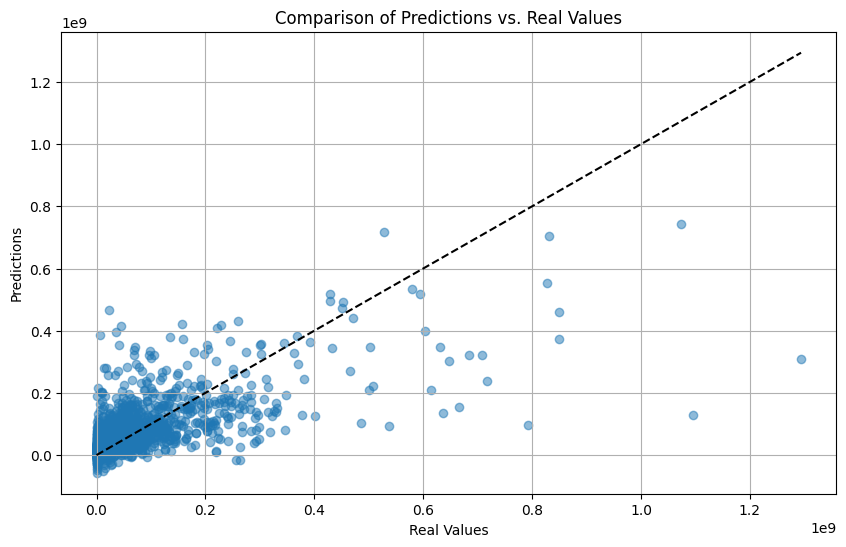

In [ ]:
import matplotlib.pyplot as plt

#Create Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'k--')
plt.title('Comparison of Predictions vs. Real Values')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()



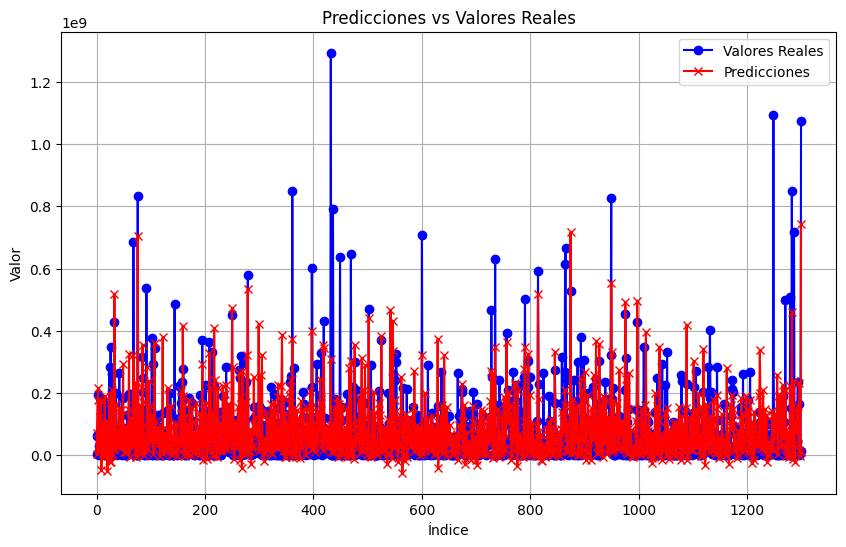

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Valores Reales', color='blue', marker='o')
plt.plot(y_pred_original, label='Predicciones', color='red', marker='x')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

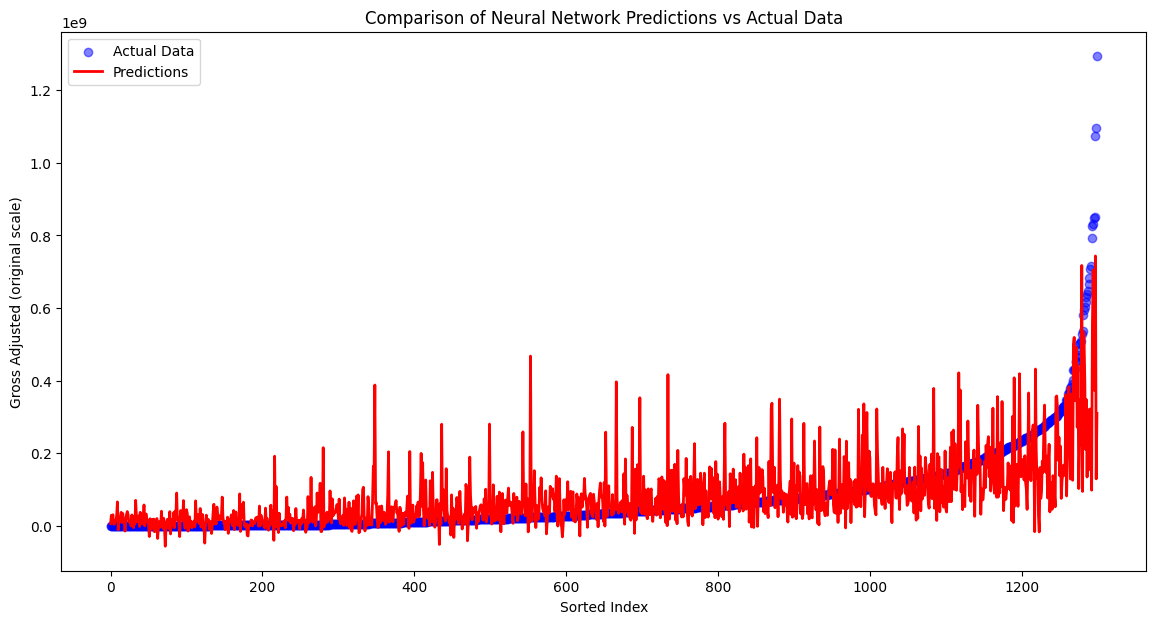

In [ ]:

# Sort the values by y_test_original for a consistent display
order = np.argsort(y_test_original)
sorted_y_test = y_test_original[order]
sorted_y_pred = y_pred_original[order]

# Creating the chart
plt.figure(figsize=(14, 7))
plt.scatter(range(len(sorted_y_test)), sorted_y_test, color='blue', label='Actual Data', alpha=0.5)
plt.plot(range(len(sorted_y_pred)), sorted_y_pred, color='red', label='Predictions', linewidth=2)
plt.title('Comparison of Neural Network Predictions vs Actual Data')
plt.xlabel('Sorted Index')
plt.ylabel('Gross Adjusted (original scale)')
plt.legend()
plt.show()


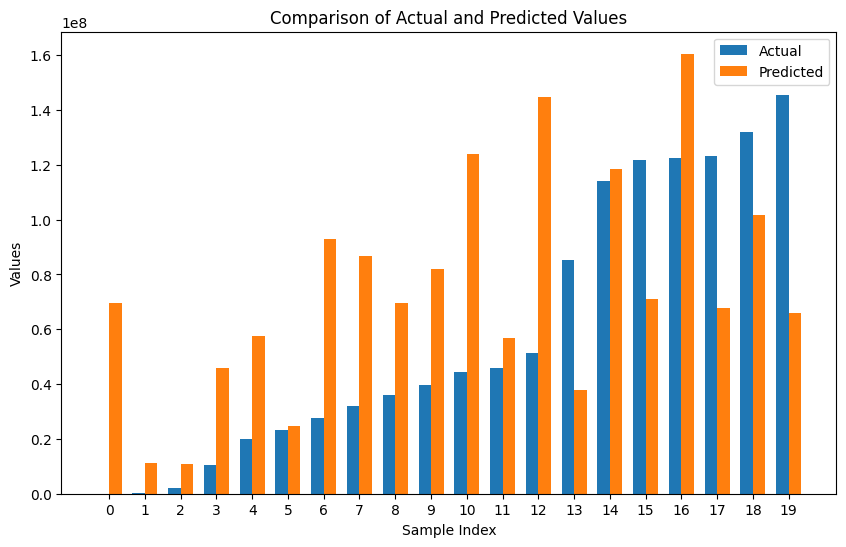

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurando que el número de muestras no exceda el tamaño de y_test_original
num_samples = min(20, len(y_test_original))

# Selección de índices aleatorios sin repetición
indices = np.random.choice(len(y_test_original), num_samples, replace=False)

# Usando los índices para seleccionar valores de y_test_original y y_pred_original
sampled_y_test = y_test_original[indices]
sampled_y_pred = y_pred_original[indices]

# Ordenar por los valores reales para una visualización más clara
order = np.argsort(sampled_y_test)
sorted_sampled_y_test = sampled_y_test[order]
sorted_sampled_y_pred = sampled_y_pred[order]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(num_samples)

plt.bar(index, sorted_sampled_y_test, bar_width, label='Actual')
# Asegurándonos de que la suma se realiza correctamente
plt.bar(index + bar_width, sorted_sampled_y_pred[:,0], bar_width, label='Predicted')

plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.xticks(index + bar_width / 2, [str(i) for i in range(num_samples)])
plt.legend()

plt.show()

In [ ]:
sorted_sampled_y_pred[:,0].shape

(20,)

# TRIAL 2

In [ ]:
pip install mlxtend